In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../dataset/train.csv')

In [4]:
df

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [5]:
! pip3 install opencv-python

In [6]:
import cv2

In [15]:
import os

from pandarallel import pandarallel
pandarallel.initialize()

def get_w_h(row):
    filepath = os.path.join('../dataset/train_images', row['image'])
    img = cv2.imread(filepath)
    h, w, _ = img.shape
    row['w'] = w
    row['h'] = h
    
    return row

df = df.parallel_apply(get_w_h, axis=1)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [16]:
df

,posting_id,image,image_phash,title,label_group,w,h
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,1024,1024
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,1000,1000
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,640,640
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,640,640
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,756,756
...,...,...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725,640,640
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533,1024,1024
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785,981,981
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013,800,800


In [17]:
import seaborn as sns

In [26]:
df['w'].describe()

count    34250.000000
mean       753.100175
std        189.337824
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
Name: w, dtype: float64

In [27]:
df['h'].describe()

count    34250.000000
mean       753.110745
std        189.319626
min        100.000000
25%        640.000000
50%        700.000000
75%        960.000000
max       5000.000000
Name: h, dtype: float64

<AxesSubplot:xlabel='w', ylabel='Count'>

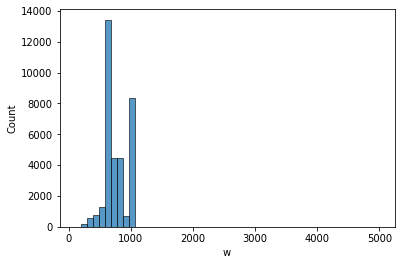

In [20]:
sns.histplot(df['w'], bins=51)

<AxesSubplot:xlabel='w', ylabel='Count'>

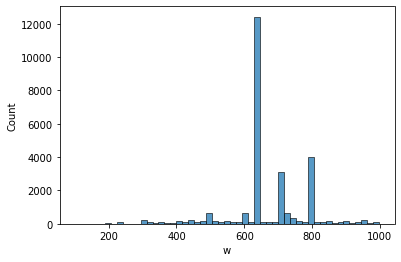

In [29]:
sns.histplot(df[df['w'] < 1000]['w'], bins=51)

<AxesSubplot:xlabel='h', ylabel='Count'>

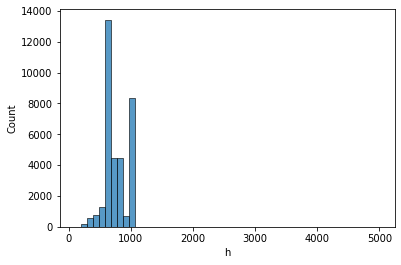

In [21]:
sns.histplot(df['h'], bins=51)

<AxesSubplot:xlabel='h', ylabel='Count'>

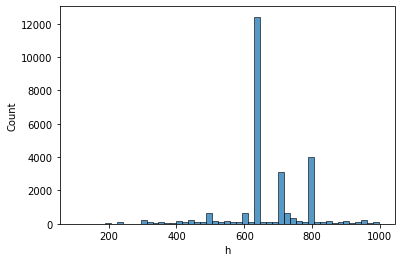

In [30]:
sns.histplot(df[df['h'] < 1000]['h'], bins=51)

In [25]:
df[df['w'] > 2000]

,posting_id,image,image_phash,title,label_group,w,h
20,train_999391364,00324695e37299a00b955674d984592b.jpg,a734d84d34702f37,Safi Dermasafe Night Moisturiser 50 gr,3624674138,4500,4501
1309,train_2579160491,0a6148e129e4f82be640d469f83d6322.jpg,ee1166be833e318a,Neutrogena Hydro Boost Water Gel 50 gr,576861546,2084,2084
2607,train_2799986403,13f811b162cc970c94f08af96f4fe0e5.jpg,fab885c3854dc467,Hilo Gold Vanilla 500G,3122966744,2083,2083
4416,train_3858672654,217c8a7f7e43fa3d1b57d72c6087793f.jpg,e6b1994cc9b66661,Bio Essence Bio-Renew Deep Cleanser 100 gr,2121458180,4167,4167
5797,train_3902094624,2bb015babb79e152008d0cba09bde0f6.jpg,fa2ab533053434dd,Clean & Clear Brightening Lemon Wash 100 ml,959690902,4168,4168
6256,train_2417225946,2f63ea678f852d482be5ef299e2a9c84.jpg,bab420d2cf8dd80f,Tropicana Slim Susu Skim Chocolate 500g,1880394849,2083,2083
6777,train_826720293,3348d4be3d520b4f257c1eaa340b7a1b.jpg,beb2e1d0cdc1f0c8,Tropicana Slim GoldenMil Vanilla Manuka Honey ...,72043261,2083,2083
9339,train_1700897367,461f2d8170790b6ea4a6d1797188e911.jpg,ca3531331b1f323b,Aveeno Baby Daily Moisture Lotion 227 g,4250826106,4168,4167
14838,train_1718950521,6fe5bbc47cae31ad88e5869f7f069954.jpg,b2b029dacc8dda0f,Tropicana Slim Susu Low Fat Vanilla 500 gr,841077506,2083,2083
18063,train_560237884,880d73c62f5df22d8c67c8711f04d6d9.jpg,bab029dece85c24d,"b""Tropicana Slim Santan 5's""",3928820175,2083,2083


In [31]:
df['ratio'] = df['h'] / df['w']

In [32]:
df['ratio'].describe()

count    34250.000000
mean         1.000146
std          0.016606
min          0.484375
25%          1.000000
50%          1.000000
75%          1.000000
max          2.057878
Name: ratio, dtype: float64

<AxesSubplot:xlabel='ratio', ylabel='Count'>

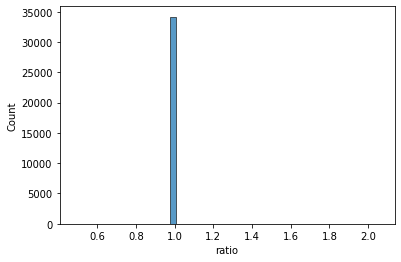

In [33]:
sns.histplot(df['ratio'], bins=51)

<AxesSubplot:xlabel='ratio', ylabel='Count'>

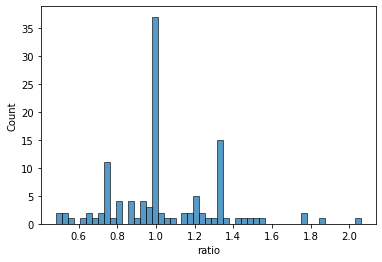

In [34]:
sns.histplot(df[df['ratio'] != 1.]['ratio'], bins=51)